In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns
# from ntscraper import Nitter
# scraper = Nitter(skip_instance_check=False)

In [3]:
terms = ["morocco,earthquake,sad", "morocco,earthquake,dead", "morocco,earthquake,negative", "morocco,earthquake,positive", "morocco,earthquake,happy", "morocco,earthquake,neutral"]
hash_tweets = scraper.get_tweets(terms, mode='term')

In [4]:
hash_tweets

[{'tweets': [{'link': 'https://twitter.com/RealHa55an/status/1700449834225004626#m',
    'text': 'Really sad to hear about the earthquake in Morocco. May Allah protect everyone and give sabr to the families who have lost their loved ones.🤲🏼',
    'user': {'name': 'Hassan Ali 🇵🇰',
     'username': '@RealHa55an',
     'profile_id': '1570574240818073601',
     'avatar': 'https://pbs.twimg.com/profile_images/1570574240818073601/j7EdpCa4_bigger.jpg'},
    'date': 'Sep 9, 2023 · 10:03 AM UTC',
    'is-retweet': True,
    'external-link': '',
    'quoted-post': {},
    'stats': {'comments': 46, 'retweets': 159, 'quotes': 0, 'likes': 5628},
    'pictures': [],
    'videos': [],
    'gifs': []},
   {'link': 'https://twitter.com/protozoo/status/1722305215829860679#m',
    'text': 'Weeks ago I sketched something for the Morocco earthquake fundraising (never finished it, due to other urgent stuff). Today found this image in the WIPs folder. Sad to think about the meaning shift just by adding 1 poi

In [2]:
final_df_1 = pd.read_excel("sentiment.xlsx")

In [3]:
x1 = ["Negative", "Negative", "Negative", "Positive", "Positive", "Neutral"]

In [4]:
def get_table_tweets(i, x1):
    text = [tweet['text'] for tweet in hash_tweets[i]['tweets']]
    user = [tweet['user']['name'] for tweet in hash_tweets[i]['tweets']]
    date = [tweet['date'] for tweet in hash_tweets[i]['tweets']]
    comments = [tweet['stats']['comments'] for tweet in hash_tweets[i]['tweets']]        
    retweets = [tweet['stats']['retweets'] for tweet in hash_tweets[i]['tweets']]        
    likes = [tweet['stats']['likes'] for tweet in hash_tweets[i]['tweets']]        
    quotes = [tweet['stats']['quotes'] for tweet in hash_tweets[i]['tweets']]        
    type = [x1[i] for tweet in hash_tweets[i]['tweets']]
    df1 = pd.DataFrame({"text": text, "date": date, "user": user, "comments": comments, "retweets": retweets, "likes": likes, "quotes": quotes, "type": type})
    return df1

In [103]:
final_df_1

,text,date,user,comments,retweets,likes,quotes,type
0,Really sad to hear about the earthquake in Mor...,"Sep 9, 2023 · 10:03 AM UTC",Hassan Ali 🇵🇰,46,159,5628,0,Negative
1,Weeks ago I sketched something for the Morocco...,"Nov 8, 2023 · 5:28 PM UTC",Daniel Aguilar,0,1,10,0,Negative
2,This year has been a very sad 1 for Islam War...,"Oct 19, 2023 · 4:25 PM UTC",Dtn.Amrex Wakanda (RDN),0,0,1,0,Negative
3,His PR & his agent did him bad but it’s still...,"Oct 18, 2023 · 1:11 PM UTC",MOMO 🔻,0,0,0,0,Negative
4,Why Allah is not helping muslim countries and ...,"Oct 16, 2023 · 2:54 AM UTC",Freethinker,0,0,0,0,Negative
...,...,...,...,...,...,...,...,...
4418,He bhagwan abhi phir se job change! #Recruitm...,"Aug 3, 2023 · 12:55 PM UTC",AideWiser SolTek,0,0,0,0,Positive
4419,24 White Neutral Parts of the Body Flashcards ...,"Oct 8, 2023 · 4:53 AM UTC",$Freya,0,0,1,0,Neutral
4420,Weird Earthquakes hard to believe they are neu...,"Sep 14, 2023 · 5:57 AM UTC",ናቲ,0,0,0,0,Neutral
4421,"Nope, Morocco earthquake was not caused by Nep...","Sep 9, 2023 · 9:28 AM UTC",prajesh,0,0,0,1,Neutral


In [3]:
final_df_1['date'] = pd.to_datetime(final_df_1['date'], format='%b %d, %Y · %I:%M %p UTC')
final_df_1['only_date'] = final_df_1['date'].dt.date

In [4]:
final_df_1

,Unnamed: 0,text,date,user,comments,retweets,likes,quotes,type,only_date
0,0,Really sad to hear about the earthquake in Mor...,2023-09-09 10:03:00,Hassan Ali 🇵🇰,46,159,5628,0,Negative,2023-09-09
1,1,Weeks ago I sketched something for the Morocco...,2023-11-08 17:28:00,Daniel Aguilar,0,1,10,0,Negative,2023-11-08
2,2,This year has been a very sad 1 for Islam War...,2023-10-19 16:25:00,Dtn.Amrex Wakanda (RDN),0,0,1,0,Negative,2023-10-19
3,3,His PR & his agent did him bad but it’s still...,2023-10-18 13:11:00,MOMO 🔻,0,0,0,0,Negative,2023-10-18
4,4,Why Allah is not helping muslim countries and ...,2023-10-16 02:54:00,Freethinker,0,0,0,0,Negative,2023-10-16
...,...,...,...,...,...,...,...,...,...,...
4418,4418,He bhagwan abhi phir se job change! #Recruitm...,2023-08-03 12:55:00,AideWiser SolTek,0,0,0,0,Positive,2023-08-03
4419,4419,24 White Neutral Parts of the Body Flashcards ...,2023-10-08 04:53:00,$Freya,0,0,1,0,Neutral,2023-10-08
4420,4420,Weird Earthquakes hard to believe they are neu...,2023-09-14 05:57:00,ናቲ,0,0,0,0,Neutral,2023-09-14
4421,4421,"Nope, Morocco earthquake was not caused by Nep...",2023-09-09 09:28:00,prajesh,0,0,0,1,Neutral,2023-09-09


In [5]:
checker_df = final_df_1[(final_df_1['date'] > '2023-09-1') & (final_df_1['date'] < '2023-09-20')]

In [6]:
checker_df['only_date'] = checker_df['date'].dt.date

C:\Users\91997\AppData\Local\Temp\ipykernel_2136\3425312187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checker_df['only_date'] = checker_df['date'].dt.date


In [7]:
checker_df

,Unnamed: 0,text,date,user,comments,retweets,likes,quotes,type,only_date
0,0,Really sad to hear about the earthquake in Mor...,2023-09-09 10:03:00,Hassan Ali 🇵🇰,46,159,5628,0,Negative,2023-09-09
18,18,It has been a week of activity in the cryptowo...,2023-09-18 15:29:00,Malin sibigam(cryptomama) MT,3,0,0,0,Negative,2023-09-18
19,19,When watching BBC UK and BBC America on TV in ...,2023-09-18 12:36:00,Katsu.,0,0,1,0,Negative,2023-09-18
20,20,Oh I'm so sorry dear don't worry about me... I...,2023-09-18 10:22:00,Marwoa Mohamed🇵🇸,1,0,2,0,Negative,2023-09-18
21,21,Why are you sad & need hug? You should be happ...,2023-09-17 03:51:00,Syed a ahmed,0,0,0,0,Negative,2023-09-17
...,...,...,...,...,...,...,...,...,...,...
4416,4416,But I think the whole of Morocco will be stunn...,2023-09-09 00:49:00,Yassine🇲🇦🇳🇱,2,0,3,0,Positive,2023-09-09
4417,4417,Ha ha ha - dared to be slightly happy and then...,2023-09-08 23:55:00,Toni Hargis,4,1,4,0,Positive,2023-09-08
4420,4420,Weird Earthquakes hard to believe they are neu...,2023-09-14 05:57:00,ናቲ,0,0,0,0,Neutral,2023-09-14
4421,4421,"Nope, Morocco earthquake was not caused by Nep...",2023-09-09 09:28:00,prajesh,0,0,0,1,Neutral,2023-09-09


In [8]:
plotter_df = checker_df[['only_date', 'retweets', 'type']]

In [9]:
value_counts_series = plotter_df[['only_date', 'type']].value_counts()
value_counts_df = value_counts_series.reset_index(name='count')

In [10]:
value_counts_df.sort_values(by='only_date', inplace=True)

In [11]:
value_counts_df.to_excel("valuer.xlsx")

Text(0, 0.5, 'Tweets')

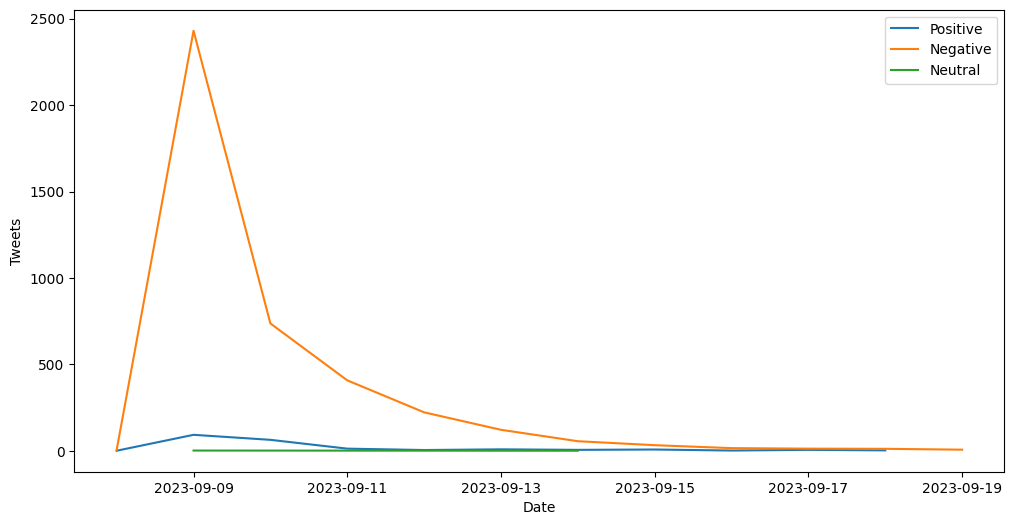

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=value_counts_df[:], x='only_date', y='count', hue='type')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Tweets")
# plt.savefig("tweets.png", bbox_inches="tight")

In [13]:
final_df_1.to_excel("sentiment.xlsx")

In [14]:
final_df_1

,Unnamed: 0,text,date,user,comments,retweets,likes,quotes,type,only_date
0,0,Really sad to hear about the earthquake in Mor...,2023-09-09 10:03:00,Hassan Ali 🇵🇰,46,159,5628,0,Negative,2023-09-09
1,1,Weeks ago I sketched something for the Morocco...,2023-11-08 17:28:00,Daniel Aguilar,0,1,10,0,Negative,2023-11-08
2,2,This year has been a very sad 1 for Islam War...,2023-10-19 16:25:00,Dtn.Amrex Wakanda (RDN),0,0,1,0,Negative,2023-10-19
3,3,His PR & his agent did him bad but it’s still...,2023-10-18 13:11:00,MOMO 🔻,0,0,0,0,Negative,2023-10-18
4,4,Why Allah is not helping muslim countries and ...,2023-10-16 02:54:00,Freethinker,0,0,0,0,Negative,2023-10-16
...,...,...,...,...,...,...,...,...,...,...
4418,4418,He bhagwan abhi phir se job change! #Recruitm...,2023-08-03 12:55:00,AideWiser SolTek,0,0,0,0,Positive,2023-08-03
4419,4419,24 White Neutral Parts of the Body Flashcards ...,2023-10-08 04:53:00,$Freya,0,0,1,0,Neutral,2023-10-08
4420,4420,Weird Earthquakes hard to believe they are neu...,2023-09-14 05:57:00,ናቲ,0,0,0,0,Neutral,2023-09-14
4421,4421,"Nope, Morocco earthquake was not caused by Nep...",2023-09-09 09:28:00,prajesh,0,0,0,1,Neutral,2023-09-09


In [15]:
def remove_punct(text):
    import string as st
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [123]:
!pip install nltk

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91997\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return " ".join(filtered_sentence)

In [18]:
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [19]:
def lemm_stem(text):
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    text = stemmer.stem(text)
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    text = lemmatizer.lemmatize(text)
    return text

In [20]:
def preprocess(text):
    import re
    text = text.lower()
    text = remove_punct(text)
    text = remove_stop_words(text)
    text = lemm_stem(text)
    # Remove irr character and number
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Whitespaces
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip()
    return text

In [21]:
final_df_1['preprocessed_text'] = final_df_1['text'].apply(lambda x: preprocess(x))

In [22]:
final_df_1.to_excel("preprocessed_final_1.xlsx")

In [23]:
from wordcloud import WordCloud

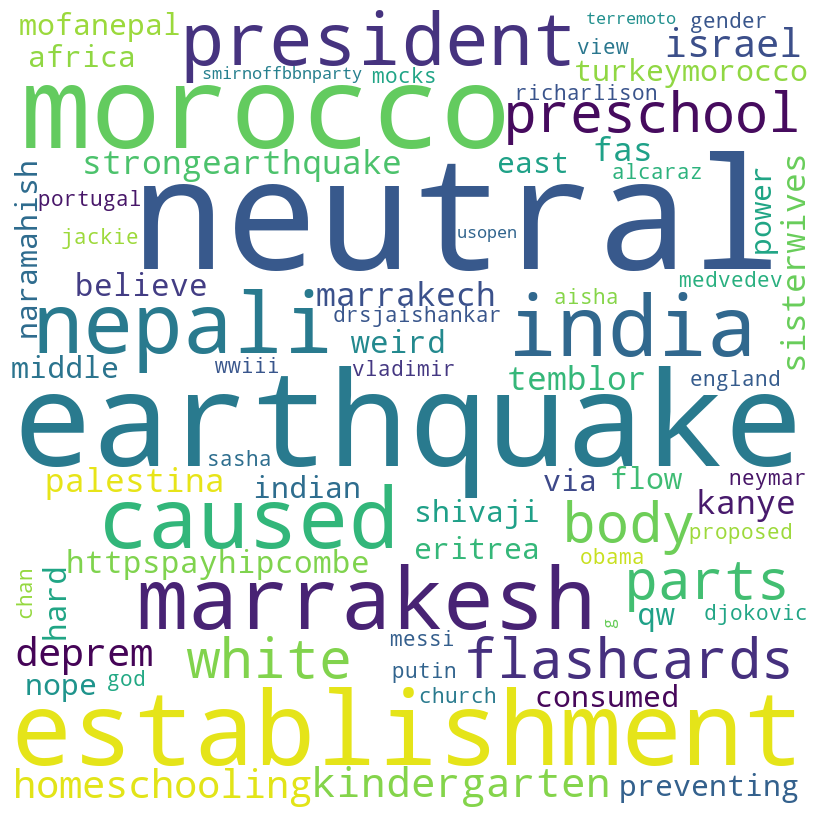

In [24]:
comment_words = '' 
# iterate through the csv file
x1 = final_df_1[final_df_1.type=="Neutral"].copy()
for val in x1.preprocessed_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wordcloud_neutral.png", bbox_inches="tight")
plt.show()

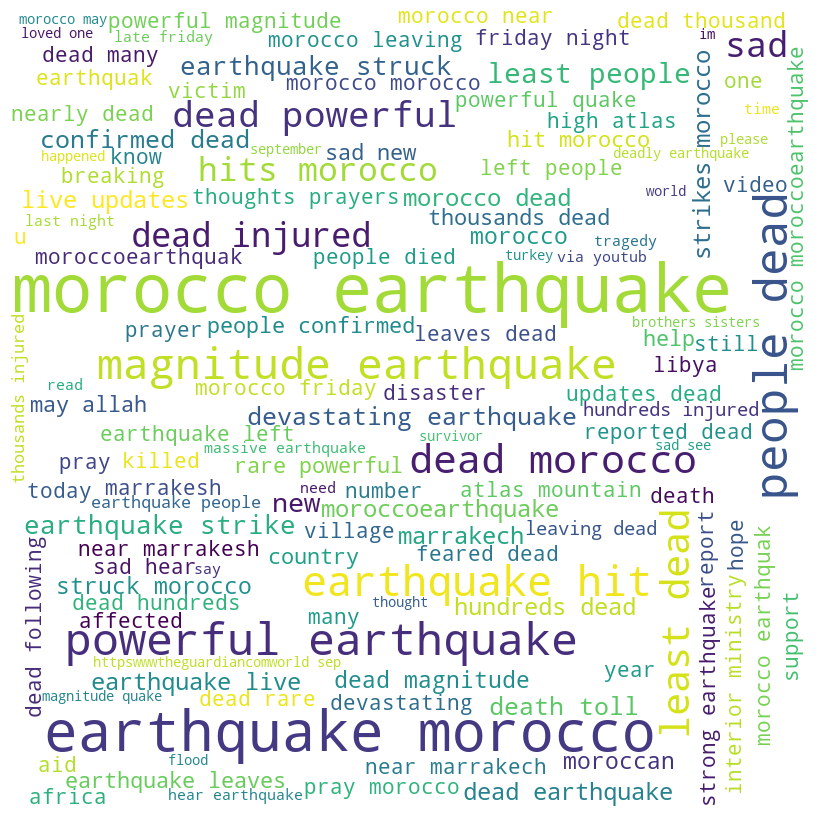

In [25]:
comment_words = '' 
# iterate through the csv file
x1 = final_df_1[final_df_1.type=="Negative"].copy()
for val in x1.preprocessed_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wordcloud_neutral.png", bbox_inches="tight")
plt.show()

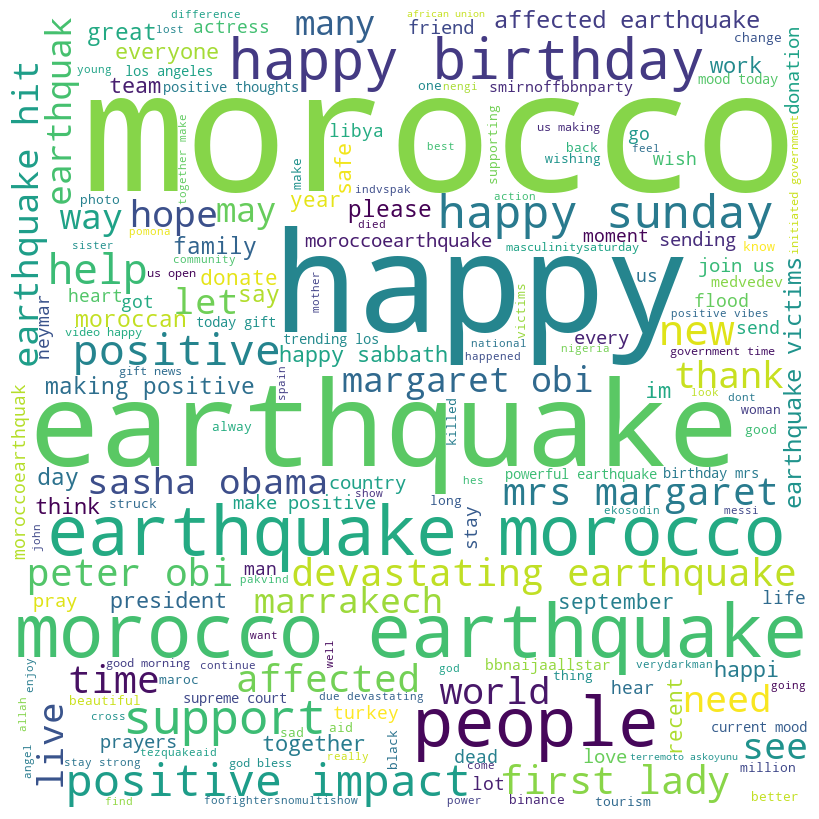

In [26]:
comment_words = '' 
# iterate through the csv file
x1 = final_df_1[final_df_1.type=="Positive"].copy()
for val in x1.preprocessed_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wordcloud_neutral.png", bbox_inches="tight")
plt.show()